High-stress groups often show greater variability in sleep, heart rate, and health indicators → noise helps simulate that.

Low-stress groups are usually more stable → don’t distort them with noise.


In [31]:
import numpy as np 
import pandas as pd

df = pd.read_csv('merge.csv')
df.head(100)

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
0,1,27,6.1,6.0,42,6,2,1.518072,77,4200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,28,6.2,6.0,60,8,1,1.562500,75,10000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,28,5.9,4.0,30,8,3,1.555556,85,3000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,28,5.9,4.0,30,8,3,1.555556,85,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,29,6.3,6.0,40,7,3,1.555556,82,3500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,52,8.4,9.0,30,3,1,1.562500,65,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0,53,8.3,9.0,30,3,1,1.562500,65,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0,53,8.5,9.0,30,3,1,1.562500,65,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0,53,8.4,9.0,30,3,1,1.562500,65,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.count()

Gender                             1509
Age                                1509
Sleep Duration                     1509
Quality of Sleep                   1509
Physical Activity Level            1509
Stress Level                       1509
BMI Category                       1509
Blood Pressure                     1509
Heart Rate                         1509
Daily Steps                        1509
Occupation_Accountant              1509
Occupation_Doctor                  1509
Occupation_Engineer                1509
Occupation_Lawyer                  1509
Occupation_Manager                 1509
Occupation_Manual Labor            1509
Occupation_Nurse                   1509
Occupation_Office Worker           1509
Occupation_Retired                 1509
Occupation_Sales Representative    1509
Occupation_Salesperson             1509
Occupation_Scientist               1509
Occupation_Software Engineer       1509
Occupation_Student                 1509
Occupation_Teacher                 1509


In [33]:
high_stress_mask = df["Stress Level"] > 7
high_stress_subset = df.loc[high_stress_mask].copy()

for feature in features_to_noise:
    std_dev = df[feature].std()
    noise = np.random.normal(0, noise_std * std_dev, size=len(high_stress_subset))
    high_stress_subset[feature] += noise


high_stress_subset["Stress Level"] = high_stress_subset["Stress Level"].clip(1, 10)

In [34]:
Most_Stressed = ((df["Occupation_Office Worker"]==1) | (df["Occupation_Doctor"]==1) | (df["Occupation_Student"]==1))

stressed_subset  = df.loc[Most_Stressed].copy()
features_to_noise = [
    "Sleep Duration", "Quality of Sleep" , "Blood Pressure", "Heart Rate", "Stress Level"
]

noise_std = 0.1
for feature in features_to_noise:
    std_dev = df[feature].std()
    noise = np.random.normal(0, noise_std * std_dev, size=len(stressed_subset))
    stressed_subset[feature] += noise

stressed_subset["Stress Level"] = stressed_subset["Stress Level"].clip(1, 10)



In [ ]:
df_noised = pd.concat([high_stress_subset, stressed_subset], ignore_index=True)
df_noised

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
0,1,28,6.348132,6.084072,60,7.881894,1,1.531428,75.378045,10000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,28,5.772965,3.923722,30,7.866849,3,1.546163,84.411611,3000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,28,5.711084,4.041756,30,8.279572,3,1.573713,83.604631,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,29,6.269416,5.972477,30,7.786505,1,1.497059,71.373379,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,29,5.813854,5.817291,30,8.025592,1,1.481571,70.518894,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,52,6.887858,6.309684,2,3.737266,3,1.463995,75.680501,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551,0,23,6.180006,5.911390,4,4.046024,1,1.491627,75.901144,10000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552,0,55,7.812329,7.122547,3,5.581978,3,1.508138,58.917861,5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,1,35,7.138359,6.630789,4,7.194502,3,1.867905,72.345313,7000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_noised.count()

Gender                             555
Age                                555
Sleep Duration                     555
Quality of Sleep                   555
Physical Activity Level            555
Stress Level                       555
BMI Category                       555
Blood Pressure                     555
Heart Rate                         555
Daily Steps                        555
Occupation_Accountant              555
Occupation_Doctor                  555
Occupation_Engineer                555
Occupation_Lawyer                  555
Occupation_Manager                 555
Occupation_Manual Labor            555
Occupation_Nurse                   555
Occupation_Office Worker           555
Occupation_Retired                 555
Occupation_Sales Representative    555
Occupation_Salesperson             555
Occupation_Scientist               555
Occupation_Software Engineer       555
Occupation_Student                 555
Occupation_Teacher                 555
dtype: int64

In [37]:
df_augumented = pd.concat([df_noised, df], ignore_index=True)
df_augumented


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
0,1,28,6.348132,6.084072,60,7.881894,1,1.531428,75.378045,10000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,28,5.772965,3.923722,30,7.866849,3,1.546163,84.411611,3000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,28,5.711084,4.041756,30,8.279572,3,1.573713,83.604631,3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,29,6.269416,5.972477,30,7.786505,1,1.497059,71.373379,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,29,5.813854,5.817291,30,8.025592,1,1.481571,70.518894,8000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,0,36,8.000000,7.000000,5,4.000000,2,1.724638,87.000000,7000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2060,1,49,7.000000,6.500000,2,9.000000,1,1.530120,78.000000,6000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061,0,37,7.000000,6.500000,3,5.000000,2,1.697368,65.000000,8000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2062,0,24,5.000000,5.500000,2,8.000000,1,1.469880,65.000000,7000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_augumented = df_augumented[(df_augumented["Quality of Sleep"] <= 10) & (df_augumented["Sleep Duration"] <= 12)]

In [ ]:
df_augumented = df_augumented[df_augumented["Stress Level"] >= 0]


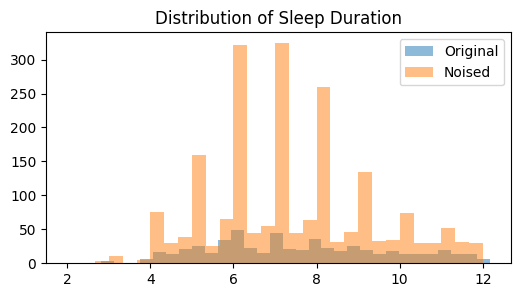

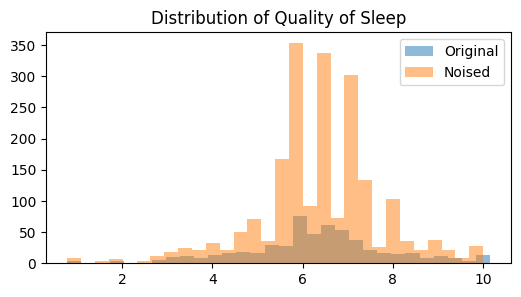

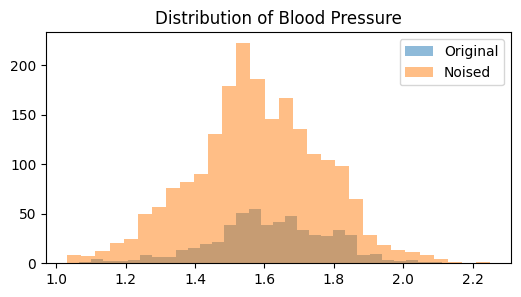

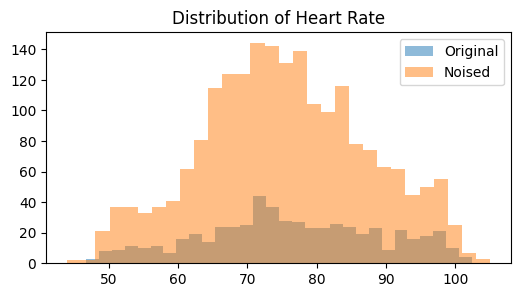

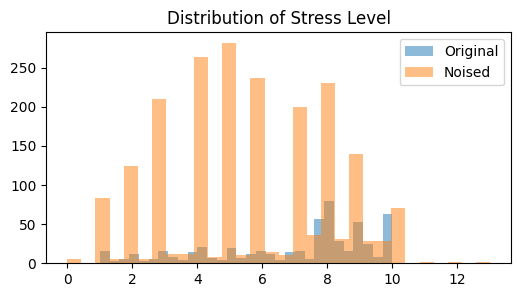

In [40]:
import matplotlib.pyplot as plt

for feature in features_to_noise:
    plt.figure(figsize=(6, 3))
    plt.hist(df_noised[feature], alpha=0.5, label='Original', bins=30)
    plt.hist(df_augumented[feature], alpha=0.5, label='Noised', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

In [41]:
df.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,...,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,0.500331,36.825712,7.237906,6.426309,23.353214,5.127237,1.846918,1.565142,75.086812,8666.603048,...,0.063618,0.075547,0.065606,0.062956,0.064944,0.063618,0.054341,0.064944,0.072896,0.070245
std,0.500166,11.193238,1.814909,1.259075,33.564309,2.269561,0.935463,0.190010,11.443484,3559.011971,...,0.244153,0.264359,0.247675,0.242964,0.246508,0.244153,0.226764,0.246508,0.260052,0.255645
min,0.000000,5.000000,2.000000,1.000000,0.000000,-2.000000,0.000000,1.031915,44.000000,2000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,6.000000,6.000000,3.000000,3.000000,1.000000,1.448718,67.000000,6131.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,7.000000,6.500000,4.000000,5.000000,2.000000,1.555556,75.000000,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,44.000000,8.000000,7.000000,39.000000,7.000000,3.000000,1.694444,83.000000,10000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,90.000000,12.000000,10.000000,120.000000,13.000000,3.000000,2.250000,105.000000,19958.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df_noised.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
count,555.000000,555.000000,555.000000,555.000000,555.00000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.517117,38.349550,7.585456,6.268988,43.85045,6.971180,1.679279,1.618680,76.322318,9900.547748,...,0.054054,0.027027,0.243243,0.046847,0.019820,0.010811,0.021622,0.021622,0.254054,0.023423
std,0.500158,12.834421,2.157155,1.634459,38.88028,2.463630,1.031027,0.169523,12.871308,4670.632419,...,0.226328,0.162308,0.429428,0.211501,0.139506,0.103505,0.145576,0.145576,0.435721,0.151381
min,0.000000,7.000000,2.815607,0.782057,1.00000,1.000000,0.000000,1.066425,46.774331,2186.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,5.943513,5.455004,4.00000,5.187661,1.000000,1.519684,67.618236,6580.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,38.000000,7.307629,6.307403,32.00000,7.886621,2.000000,1.619499,75.486278,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,47.000000,9.159266,7.104781,77.50000,8.856487,3.000000,1.737814,85.965515,13752.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,90.000000,12.170547,10.151699,120.00000,10.000000,3.000000,2.112162,102.344060,19958.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_augumented.describe()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Manual Labor,Occupation_Nurse,Occupation_Office Worker,Occupation_Retired,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Student,Occupation_Teacher
count,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,...,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000,2053.000000
mean,0.504140,37.202143,7.325629,6.379264,28.859717,5.628053,1.796883,1.579780,75.391967,8991.113980,...,0.060887,0.062835,0.112518,0.058938,0.052119,0.049683,0.045300,0.053580,0.120799,0.057964
std,0.500105,11.667024,1.909690,1.362240,36.257685,2.440077,0.964350,0.186166,11.851873,3926.418425,...,0.239180,0.242725,0.316080,0.235566,0.222321,0.217343,0.208011,0.225242,0.325973,0.233732
min,0.000000,5.000000,2.000000,0.782057,0.000000,0.000000,0.000000,1.031915,44.000000,2000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,6.000000,5.865116,3.000000,4.000000,1.000000,1.470588,67.330193,6172.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,7.000000,6.500000,4.000000,5.781959,2.000000,1.573333,75.000000,8000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,44.000000,8.500000,7.000000,55.000000,7.890418,3.000000,1.705128,83.496008,10490.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,90.000000,12.000000,10.000000,120.000000,13.000000,3.000000,2.250000,105.000000,19958.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


            Gender          Age  Sleep Duration  Quality of Sleep  \
count  2053.000000  2053.000000     2053.000000       2053.000000   
mean      0.504140    37.202143        7.325629          6.379264   
std       0.500105    11.667024        1.909690          1.362240   
min       0.000000     5.000000        2.000000          0.782057   
25%       0.000000    29.000000        6.000000          5.865116   
50%       1.000000    36.000000        7.000000          6.500000   
75%       1.000000    44.000000        8.500000          7.000000   
max       1.000000    90.000000       12.000000         10.000000   

       Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
count              2053.000000   2053.000000   2053.000000     2053.000000   
mean                 28.859717      5.628053      1.796883        1.579780   
std                  36.257685      2.440077      0.964350        0.186166   
min                   0.000000      0.000000      0.000000        

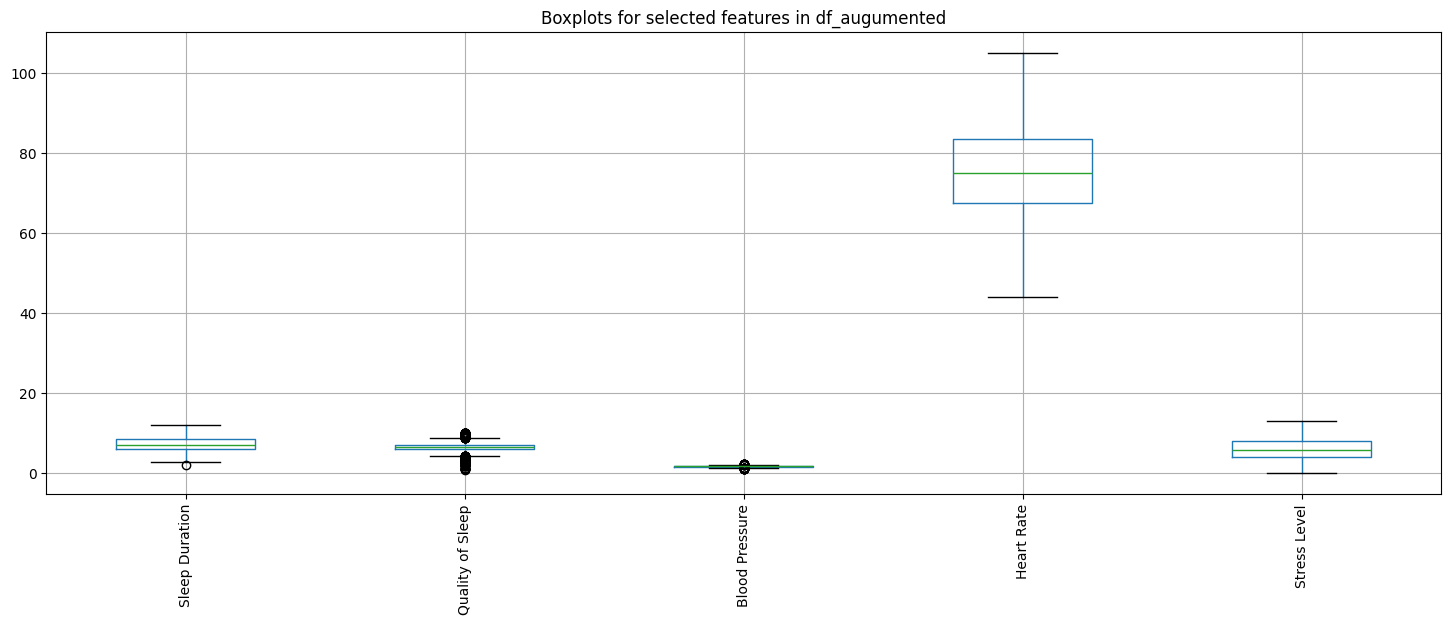

In [44]:

print(df_augumented.describe())

df_augumented[features_to_noise].boxplot(figsize=(18, 6), rot=90)
plt.title("Boxplots for selected features in df_augumented")
plt.show()

In [45]:
df_augumented.to_csv('Added_Noise_augmented_data.csv', index=False)